# Image classification with the MNIST dataset (Convolutional Neural Network)

In this section we'll implement and train a Convolutional Neural Network (CNN) to classify handwritten digits using the MNIST dataset. We'll see how convolutional layers (`Conv2D`) and pooling layers (`MaxPooling2D`) effectively extract features from images.

![Convolutional NN](convolutional_nn.png)

*Original source: NVIDIA DLI course*

Recommended theoretical tutorial:
- [3Blue1Brown video on CNNs](https://www.youtube.com/watch?v=aircAruvnKk)

## Goals
* Understand how convolutional layers work for feature extraction.
* Learn how to use `Conv2D` and `MaxPooling2D` layers in Keras/TensorFlow.
* Build and train a simple CNN model for image classification.

In [2]:
#!pip install tensorflow
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.20.0


## Loading and Preparing the Data

We load the MNIST dataset. The images are 28×28 pixels in grayscale.

In [4]:
# Loading the MNIST dataset
(x_train, y_train), (x_valid, y_valid) = tf.keras.datasets.mnist.load_data()

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_valid shape: {x_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_valid shape: (10000, 28, 28)
y_valid shape: (10000,)


### Normalization and Reshaping

The images are currently in the range [0, 255]. We will normalize them to [0, 1] by dividing by 255.0 and convert them to `float32`.

Key for CNNs: convolutional layers expect 4D input: (num_samples, height, width, channels). MNIST images are 28×28 with a single channel (grayscale), so we must reshape them from `(num_samples, 28, 28)` to `(num_samples, 28, 28, 1)`.

In [5]:
# Normalization of pixels to the range [0, 1]
x_train = x_train.astype(np.float32) / 255.0
x_valid = x_valid.astype(np.float32) / 255.0

# Reshaping data for Conv2D layers: adding channel dimension
# Now the shape is (number_of_samples, height, width, channels)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)

print(f"x_train shape after normalization and reshaping: {x_train.shape}")
print(f"x_valid shape after normalization and reshaping: {x_valid.shape}")

x_train shape after normalization and reshaping: (60000, 28, 28, 1)
x_valid shape after normalization and reshaping: (10000, 28, 28, 1)


### Sample visualization
Display a few images from the training dataset.

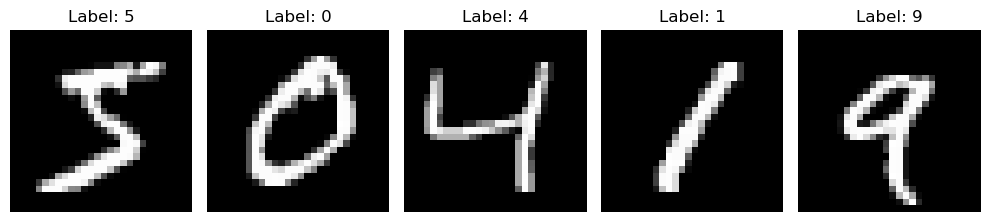

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

## Building the Convolutional Model (CNN)

Now we'll define the model using `tf.keras.Sequential`. The model will consist of:
- **`Conv2D` layers:** Filter the input image to learn various patterns/features (e.g., edges, textures).
- **`MaxPooling2D` layers:** Reduce the dimensionality (resolution) of the image, decreasing the number of parameters and helping to prevent overfitting.
- **`Flatten` layer:** Converts the 2D output from convolutional layers into a 1D vector suitable for `Dense` layers.
- **`Dense` layers:** Fully connected layers that make the final classification decision.

In [7]:
model = tf.keras.Sequential([
    # Input layer: the first Conv2D layer expects 'input_shape'
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Third convolutional block (optional, more can be added)
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flattening 2D output to 1D for Dense layers
    tf.keras.layers.Flatten(),
    
    # Dense (fully connected) layers
    tf.keras.layers.Dense(64, activation='relu'),
    
    # Output layer: 10 neurons for 10 classes (digits 0-9), 'softmax' for probabilities
    tf.keras.layers.Dense(10, activation='softmax')
])

# Display model architecture
model.summary()

C:\Users\Windows 10\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

##  Compiling the model
We define the optimizer, loss function, and metrics used to track performance during training.

In [9]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # We use this because the labels are integers (0-9)
    metrics=['accuracy']
)

## Training the model

We train the model using the training data and validate it on the validation set. The `epochs` parameter specifies how many times the model will iterate over the entire training dataset.

In [10]:
history = model.fit(
    x_train,
    y_train,
    epochs=5, # You can increase the number of epochs for better accuracy
    validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9546 - loss: 0.1488 - val_accuracy: 0.9833 - val_loss: 0.0530
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9862 - loss: 0.0450 - val_accuracy: 0.9867 - val_loss: 0.0393
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9906 - loss: 0.0316 - val_accuracy: 0.9899 - val_loss: 0.0317
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9922 - loss: 0.0253 - val_accuracy: 0.9894 - val_loss: 0.0351
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9933 - loss: 0.0203 - val_accuracy: 0.9901 - val_loss: 0.0301


## Model Evaluation

We evaluate the model's performance on the test (validation) set.

In [11]:
loss, accuracy = model.evaluate(x_valid, y_valid, verbose=0)
print(f"Evaluation on validation set:\nLoss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Evaluation on validation set:
Loss: 0.0301, Accuracy: 0.9901


### Training history visualization

We display how training and validation loss and accuracy changed over the epochs.

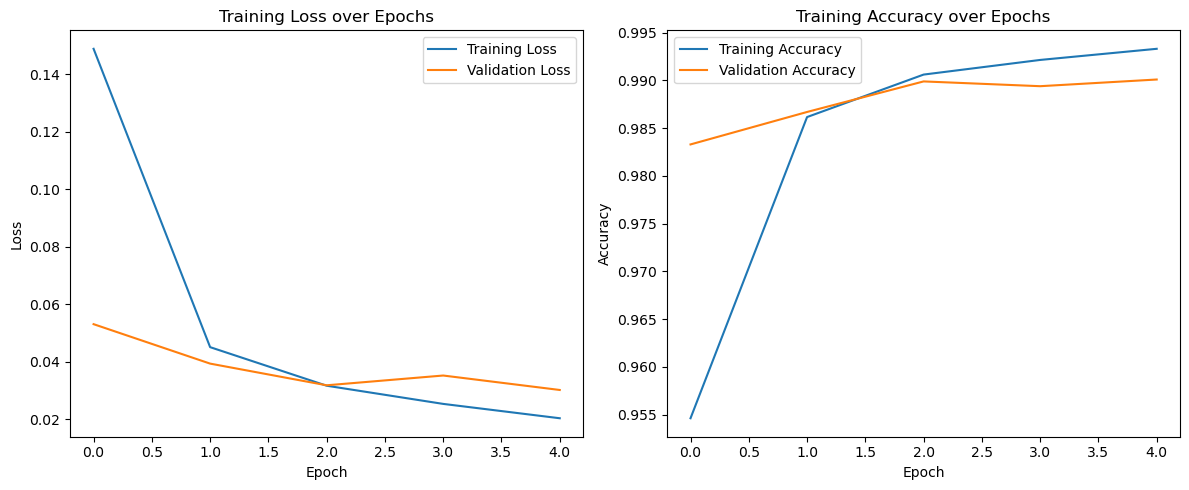

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Prediction on individual images

Demonstration of how the model predicts labels for individual images from the validation set.

True label of the image: 9
Output from the network (softmax probabilities): 
[[8.0680840e-09 1.9242658e-07 1.3008386e-08 4.0183818e-07 4.9493334e-04
  3.6838667e-06 4.7952402e-09 1.3229363e-03 1.3250055e-07 9.9817765e-01]]
Predicted label: 9


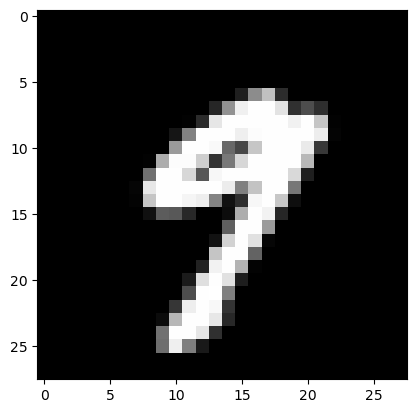

In [13]:
# Display one image from the validation set and use the model to make a prediction
import numpy as np

i = 20
image = x_valid[i]
plt.imshow(image.reshape((28, 28)), cmap="gray")
gt_label = np.argmax(y_valid[i]) if len(y_valid[i].shape) > 0 else y_valid[i]
print(f"True label of the image: {gt_label}")

# Prediction requires a batch dimension (1, 28, 28, 1)
logits = model(image.reshape(1, 28, 28, 1), training=False)
print(f"Output from the network (softmax probabilities): \n{logits}")
pred_label = np.argmax(logits)
print(f"Predicted label: {pred_label}")

## Try training your own model now

**Ideas for experimentation:**
* Change the number and size of `Conv2D` layers (e.g., `Conv2D(16, (5,5))`).
* Add more `MaxPooling2D` layers or change their pool size (e.g., `(3,3)`).
* Change the number of neurons in `Dense` layers.
* Experiment with different activation functions (`activation`).
* Change the number of `epochs` for training.